In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from articulate import articulate
from omegaconf import OmegaConf
from dotenv import load_dotenv
import os
from articulate_anything.utils.utils import (
    load_config,
    join_path,
)
from PIL import Image
from articulate_anything.utils.viz import display_code, show_video

/home/vlongle/miniconda3/envs/articulate-anything-release/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pybullet build time: Nov 28 2023 23:52:03


In [3]:
import os
os.chdir("..")

In [4]:
API_KEY = "YOUR-ACTUAL-API-KEY"
## we have our API key stored in a .env file
load_dotenv()
API_KEY = os.environ.get('API_KEY')

In [5]:
modality = "text"
prompt = "suitcase with a retractable handle"
task = "suitcase"
overwrite = False
out_dir = join_path("results", modality, task)

In [6]:
cfg = load_config()
cfg.prompt = prompt
cfg.modality = modality
cfg.out_dir = out_dir
cfg.api_key = API_KEY

cfg.model_name = "claude-3-5-sonnet-20241022"

cfg.joint_actor.mode = "text"
cfg.joint_actor.targetted_affordance = False
cfg.gen_config.overwrite = overwrite

/home/vlongle/miniconda3/envs/articulate-anything-release/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


First, make sure that you preprocess the partnet dataset first. Run

```
python articulate_anything/preprocess/preprocess_partnet.py parallel={int} modality=text
```

This will combine meshes belonging to one link to one mesh and also render the links and objects from multiple view for computing CLIP.

In [7]:
steps = articulate(cfg)

INFO:root:Setting seed 0
INFO:root:Starting Mesh Retrieval
INFO:root:TextTaskSpecifier: Prediction already exists at results/text/suitcase/task_specifier/task_specifier.json. Skipping generation.
INFO:root:TextLayoutPlanner: Prediction already exists at results/text/suitcase/box_layout/box_plan.json. Skipping generation.
INFO:root:PartnetMeshRetrieval: Prediction already exists. Skipping generation.
INFO:root:Starting Link Articulation
INFO:root:>>> Saved mesh to results/text/suitcase/link_placement/iter_0/seed_0/suitcase_body.obj from partnet: datasets/partnet-mobility-v0/dataset/100550/link_2_combined_mesh.obj
INFO:root:>>> Saved mesh to results/text/suitcase/link_placement/iter_0/seed_0/suitcase_retractable_handle_base.obj from partnet: datasets/partnet-mobility-v0/dataset/101051/link_0_combined_mesh.obj
INFO:root:>>> Saved mesh to results/text/suitcase/link_placement/iter_0/seed_0/suitcase_retractable_handle.obj from partnet: datasets/partnet-mobility-v0/dataset/100837/link_0_combi

No. of link steps: 1
Picking the last link step
Link placement path: results/text/suitcase/link_placement/iter_0/seed_0/link_placement.py


INFO:root:JointPredictionActor: Prediction already exists at results/text/suitcase/joint_actor/iter_0/seed_0/joint_pred.py. Skipping generation.
pybullet build time: Nov 28 2023 23:52:03
[2024-12-09 15:13:04.465] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-12-09 15:13:04.465] [svulkan2] [warning] Continue without GLFW.



BEFORE FILTER VIDEO ['video_suitcase_body_to_suitcase_wheel_right_frontview.mp4', 'video_suitcase_retractable_handle_base_to_suitcase_retractable_handle_frontview.mp4', 'video_suitcase_body_to_suitcase_wheel_left_frontview.mp4']


INFO:root:Pipeline execution completed
INFO:root:Steps executed: Mesh Retrieval, Link actor, Link critic, Link Articulation, Joint actor, Joint critic, Joint Articulation


## Mesh Retrieval

Let's inspect the steps starting with the mesh retrieval

In [8]:
mesh_retrieval = steps["Mesh Retrieval"]

First, the VLM is asked to expand a text prompt into more details (i.e., densify the text)

In [9]:
mesh_retrieval["Task Specification"].load_prediction()

{'reasoning': 'I should create 3 parts, including: the main body of the suitcase, the retractable handle, and wheels for mobility',
 'output': 'a suitcase with a retractable handle on the top and two wheels on the bottom.'}

In [10]:
mesh_retrieval["Task Specification"].load_prediction()

{'reasoning': 'I should create 3 parts, including: the main body of the suitcase, the retractable handle, and wheels for mobility',
 'output': 'a suitcase with a retractable handle on the top and two wheels on the bottom.'}

In [11]:
mesh_retrieval["Box Layout"].load_prediction()

[{'name': 'suitcase_body',
  'description': 'The main compartment of the suitcase',
  'dimensions': [0.23, 0.36, 0.45]},
 {'name': 'suitcase_retractable_handle_base',
  'description': 'The fixed base housing for the retractable handle',
  'dimensions': [0.05, 0.15, 0.05]},
 {'name': 'suitcase_retractable_handle',
  'description': 'The telescoping part of the handle that slides up and down',
  'dimensions': [0.05, 0.15, 0.3]},
 {'name': 'suitcase_wheel_left',
  'description': 'The left wheel that allows the suitcase to roll',
  'dimensions': [0.06, 0.06, 0.06]},
 {'name': 'suitcase_wheel_right',
  'description': 'The right wheel that allows the suitcase to roll',
  'dimensions': [0.06, 0.06, 0.06]}]

In [12]:
mesh_retrieval["Mesh Retrieval"].load_prediction()

{'suitcase_body': {'mesh_file': 'datasets/partnet-mobility-v0/dataset/100550/link_2_combined_mesh.obj',
  'cosine_similarity': 0.85986328125,
  'mesh_description': 'The rectangular suitcase body, which holds the contents of the suitcase.',
  'link_description': 'suitcase_body. The main compartment of the suitcase'},
 'suitcase_retractable_handle_base': {'mesh_file': 'datasets/partnet-mobility-v0/dataset/101051/link_0_combined_mesh.obj',
  'cosine_similarity': 0.84033203125,
  'mesh_description': 'An extendable handle for the suitcase.',
  'link_description': 'suitcase_retractable_handle_base. The fixed base housing for the retractable handle'},
 'suitcase_retractable_handle': {'mesh_file': 'datasets/partnet-mobility-v0/dataset/100837/link_0_combined_mesh.obj',
  'cosine_similarity': 0.87744140625,
  'mesh_description': 'A U-shaped handle that slides up and down. The handle is attached to the suitcase via two metal rods.',
  'link_description': 'suitcase_retractable_handle. The telescop

In [13]:
mesh_retrieval["Mesh Retrieval"].cfg.out_dir

'results/text/suitcase/mesh_retrieval'

## Link Placement

In [14]:
link_art = steps["Link Articulation"]
link_actor = link_art["Link actor"][0]

Here's the code to place the links in the 3D space

In [15]:
code_string = link_actor.load_prediction()
display_code(code_string)

from articulate_anything.api.odio_urdf import *                                                                    
                                                                                                                   
def partnet_111(input_dir, links) -> Robot:                                                                        
    pred_robot = Robot(input_dir=input_dir)                                                                        
                                                                                                                   
    # Add base and suitcase body                                                                                   
    pred_robot.add_link(links["base"])                                                                             
    pred_robot.add_link(links["suitcase_body"])                                                                    
    pred_robot.add_joint(                                                                                          
        Joint(                                                                                                     
            "base_to_suitcase_body",                                                                               
            Parent("base"),                                                                                        
            Child("suitcase_body"),                                                                                
            type="fixed",                                                                                          
        )                                                                                                          
    )                                                                                                              
                                                                                                                   
    # Add handle base - should be on top of suitcase body                                                          
    pred_robot.add_link(links["suitcase_retractable_handle_base"])                                                 
    pred_robot.place_relative_to(                                                                                  
        "suitcase_retractable_handle_base",                                                                        
        "suitcase_body",                                                                                           
        placement="above",                                                                                         
        clearance=0.0                                                                                              
    )                                                                                                              
                                                                                                                   
    # Add retractable handle - should be above the handle base                                                     
    pred_robot.add_link(links["suitcase_retractable_handle"])                                                      
    pred_robot.place_relative_to(                                                                                  
        "suitcase_retractable_handle",                                                                             
        "suitcase_retractable_handle_base",                                                                        
        placement="above",                                                                                         
        clearance=0.0                                                                                              
    )                                                                                                              
                                                        

Here's a render of the predicted code

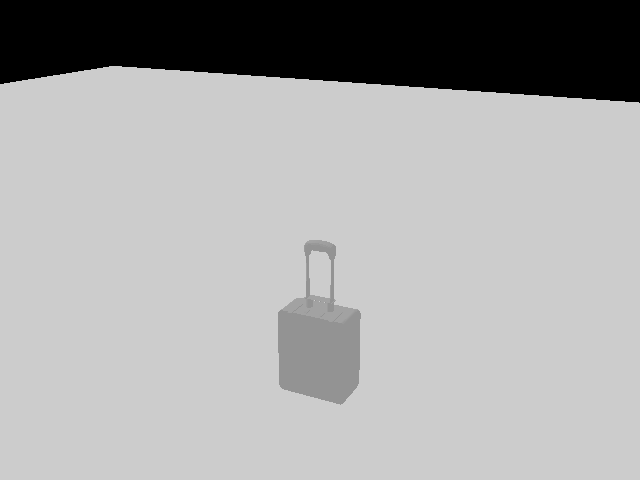

In [16]:
Image.open(join_path(link_actor.cfg.out_dir, "robot_frontview.png"))

## Joint Prediction

In [17]:
joint_art = steps["Joint Articulation"]
joint_actor = joint_art["Joint actor"][0]

In [18]:
## find all .mp4 files in the joint_actor output directory
videos = [f for f in os.listdir(joint_actor.cfg.out_dir) if f.endswith(".mp4")]
print(videos)

['video_suitcase_body_to_suitcase_wheel_right_frontview.mp4', 'video_suitcase_retractable_handle_base_to_suitcase_retractable_handle_frontview.mp4', 'video_suitcase_body_to_suitcase_wheel_left_frontview.mp4']


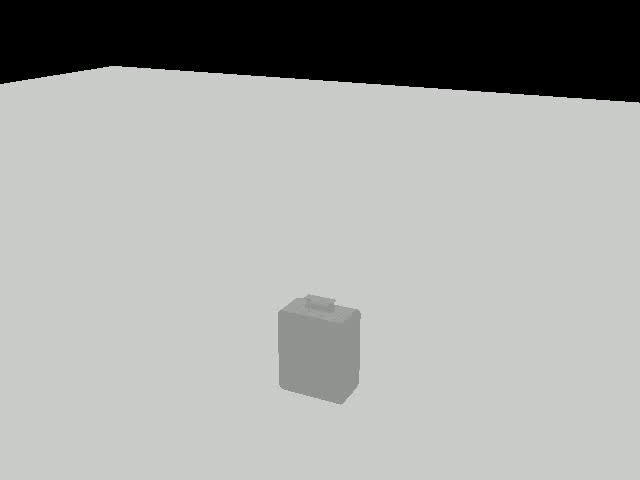

In [19]:
video = "video_suitcase_retractable_handle_base_to_suitcase_retractable_handle_frontview.mp4"
show_video(join_path(joint_actor.cfg.out_dir, video),
           use_gif=True)

In [20]:
code_string = joint_actor.load_prediction()
display_code(code_string)

from articulate_anything.api.odio_urdf import *                                                                    
                                                                                                                   
def partnet_111(input_dir, links) -> Robot:                                                                        
    pred_robot = Robot(input_dir=input_dir)                                                                        
                                                                                                                   
    # Add base and suitcase body                                                                                   
    pred_robot.add_link(links["base"])                                                                             
    pred_robot.add_link(links["suitcase_body"])                                                                    
    pred_robot.add_joint(                                                                                          
        Joint(                                                                                                     
            "base_to_suitcase_body",                                                                               
            Parent("base"),                                                                                        
            Child("suitcase_body"),                                                                                
            type="fixed",                                                                                          
        )                                                                                                          
    )                                                                                                              
                                                                                                                   
    # Add handle base - should be on top of suitcase body                                                          
    pred_robot.add_link(links["suitcase_retractable_handle_base"])                                                 
    pred_robot.place_relative_to(                                                                                  
        "suitcase_retractable_handle_base",                                                                        
        "suitcase_body",                                                                                           
        placement="above",                                                                                         
        clearance=0.0                                                                                              
    )                                                                                                              
                                                                                                                   
    # Add retractable handle - should be above the handle base                                                     
    pred_robot.add_link(links["suitcase_retractable_handle"])                                                      
    pred_robot.place_relative_to(                                                                                  
        "suitcase_retractable_handle",                                                                             
        "suitcase_retractable_handle_base",                                                                        
        placement="above",                                                                                         
        clearance=0.0                                                                                              
    )                                                                                                              
                                                        